# SPF : obtain the NutriScore of any given product

We were tasked, with a given dataset (https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-scientist/P2/fr.openfoodfacts.org.products.csv.zip), to predict the NutriScore of any given food or drink.

To do this, we will:
- Establish what relevant categories will be used
- Clean and prepare the dataset

The final objective is to determine if it is possible to suggest or auto-fill the data for a given product.


**GDPR DISCLAIMER** \
The following work is not related to GDPR. To demonstrate, we will take all  major points and justify that our work is not concerned.


- **Only collect truly useful data to achieve objectives** \
Our working dataset does not contain any personnal data of any kind, only data related to food or drinks, which we need to work on NutriScore.
- **Be transparent** \
This code is for everyone to see, and sources are cited accordingly
- **Organize and ease people's rights usage** \
No personnal data is used, making this article irrelevant for the present work
- **Establish conservation duration** \
The dataset used will be used actively for a maximum of months, after which the current project should be finished. Dataset will then be archived.
- **Secure data and identify risks** \
This project is led locally, and as such has little to no risk of outside exposure. Moreover, containing no personnal data, an eventual malevolent action would only lead to a delay in the project, and no threat potential could be gained by such an action.
- **Compliance as a continuous process** \
Once this project is finished, it will be presented and then archived. As such, the dataset compliance will not be relevant anymore.

We hope that this convinced you that this project is not in any way linked to the GDPR rules. If not, we look forward to read you remarks at this email adress:\
kanamojo@hotmail.fr

Source: https://www.cnil.fr/fr/comprendre-le-rgpd/les-six-grands-principes-du-rgpd

## NutriScore : Categories to be used

In [32]:
#DL libraries
import os
import urllib.request
import zipfile 

#Treatment libraries
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

### Dowloading data

In [2]:
# URL of the file to be downloaded
url = 'https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-scientist/P2/fr.openfoodfacts.org.products.csv.zip'

# Directory where the file will be saved
directory = 'data'
if not os.path.exists(directory):
    os.makedirs(directory)
    print("directory 'data' created")

# Define the path for the downloaded file
zip_file_path = os.path.join(directory, 'downloaded_file.zip')

# Download the file

    # Check if the file already exists
if not os.path.isfile(zip_file_path):
    # Download the file
    try:
        print("Downloading the file...")
        urllib.request.urlretrieve(url, zip_file_path)
        print("File downloaded and saved as 'downloaded_file.zip' in the 'data' directory.")
    except Exception as e:
        print("An error occurred while downloading the file:", e)
else:
    print("The file already exists. No need to download again.")

The file already exists. No need to download again.


#### Extracting data

In [3]:
# Path to the downloaded zip file
zip_file_path = 'data/downloaded_file.zip'

# Extract the zip file
try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall('data')
    print("Files extracted successfully.")
except zipfile.BadZipFile:
    print("Error: The file is not a zip file or it is corrupted.")
except Exception as e:
    print("An error occurred:", e)

Files extracted successfully.


#### Loading data

In [4]:
#Define csv path
csv_file_path = os.path.join('data', 'fr.openfoodfacts.org.products.csv')

#Load file
data = pd.read_csv(csv_file_path, sep='\t', low_memory=False)

In [5]:
#First glance
display(data.head())
display(data.describe())
data.isna().sum()
data.info()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,...,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,...,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,...,2.047841,31.967918,3.753028,18.757932,NaN,425.211439,9.055903,9.183589,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,3.770000e+02,49.400000,0.000000,...,6.300000,0.000000,12.000000,32.000000,NaN,98.750000,1.000000,1.000000,NaN,NaN
50%,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,1.100000e+03,300.000000,5.000000,...,7.200000,23.000000,15.000000,50.000000,NaN,195.750000,10.000000,9.000000,NaN,NaN
75%,NaN,3.000000,0.000000,NaN,0.000000,NaN,NaN,1.674000e+03,898.000000,20.000000,...,7.400000,51.000000,15.000000,64.250000,NaN,383.200000,16.000000,16.000000,NaN,NaN
max,NaN,31.000000,2.000000,NaN,6.000000,NaN,NaN,3.251373e+06,3830.000000,714.290000,...,8.400000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


Lots of missing values and empty columns. Let's create a function to clean the dataset of empty categories and of categories with too many missing values

In [6]:
#Prepare a function to do a list of columns to be deleted 
def define_delete(dataframe, threshold = 10):
    to_delete = []
    for col in dataframe:
      miss_norm = dataframe[col].isna().value_counts(normalize=True)
      if True in miss_norm.index:
        miss_percent = round(miss_norm.get(True, 0)*100,5)
        if miss_percent > threshold:
          to_delete.append(col)
    return to_delete

In [7]:
#Using the defined function to obtain what columns should be dropped
delete_list = define_delete(data, 50)
print(delete_list)

['generic_name', 'quantity', 'packaging', 'packaging_tags', 'categories', 'categories_tags', 'categories_fr', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'allergens', 'allergens_fr', 'traces', 'traces_tags', 'traces_fr', 'no_nutriments', 'additives_tags', 'additives_fr', 'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil', 'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_uk', 'pnns_groups_1', 'pnns_groups_2', 'main_category', 'main_category_fr', 'image_url', 'image_small_url', 'energy-from-fat_100g', 'butyric-acid_100g', 'caproic-acid_100g', 'caprylic-acid_100g', 'capric-acid_100g', 'lauric-acid_100g', 'myristic-acid_100g', 'palmitic-acid_100g', 'stearic-acid_100g', 'arachidic-acid_100g', 'behenic-acid_100g', 'lignoceric-acid_100g', 'cero

In [8]:
#Drop columns accordingly
raw_data = data.drop(columns=delete_list)
raw_data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,brands,brands_tags,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,Ferme t'y R'nao,ferme-t-y-r-nao,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,14.0
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,Torn & Glasser,torn-glasser,...,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.250,0.0,0.0
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,Grizzlies,grizzlies,...,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,12.0
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,Bob's Red Mill,bob-s-red-mill,...,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN


In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 34 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   code                                     320749 non-null  object 
 1   url                                      320749 non-null  object 
 2   creator                                  320770 non-null  object 
 3   created_t                                320769 non-null  object 
 4   created_datetime                         320763 non-null  object 
 5   last_modified_t                          320772 non-null  object 
 6   last_modified_datetime                   320772 non-null  object 
 7   product_name                             303010 non-null  object 
 8   brands                                   292360 non-null  object 
 9   brands_tags                              292352 non-null  object 
 10  countries                       

### Relevant categories to evaluate NutriScore

The Public French Health agency (SPF) published a short article that describes how to evaluate the score of a given food or drink, and also provides an excel sheet to evaluate it ourselves. This excel document tells us clearly what the relevant categories are.

**! Important !** \
An new system will be used by 2024. We based our calculations and choices on this new system. On the new system, the categorie "calorie" is used, but is not present in the dataset. It is related to energy_100g, but some conversion may be needed.

We have extracted the relevant columns:\
energy_100g / saturated-fat_100g / sugars_100g / proteins_100g / salt_100g / fiber_100g

We will also need to keep columns to identify the product and the final score:\
code / product_name / nutrition_grade_fr / nutrition-score-fr_100g


Source:
https://www.santepubliquefrance.fr/determinants-de-sante/nutrition-et-activite-physique/articles/nutri-score

In [10]:
columns_to_keep = ["code","product_name","energy_100g",
                   "saturated-fat_100g","sugars_100g",
                   "proteins_100g","salt_100g","fiber_100g",
                   "nutrition_grade_fr","nutrition-score-fr_100g"]

In [11]:
#Dropping all columns not considered relevant for the current work
relevant_data = raw_data.drop(columns=[col for col in raw_data.columns if col not in columns_to_keep])
relevant_data.head()

,code,product_name,nutrition_grade_fr,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,0000000003087,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,Banana Chips Sweetened (Whole),d,2243.0,28.57,14.29,3.6,3.57,0.00000,14.0
2,0000000004559,Peanuts,b,1941.0,0.00,17.86,7.1,17.86,0.63500,0.0
3,0000000016087,Organic Salted Nut Mix,d,2540.0,5.36,3.57,7.1,17.86,1.22428,12.0
4,0000000016094,Organic Polenta,NaN,1552.0,NaN,NaN,5.7,8.57,NaN,NaN


### A little cleanup

#### Inspection of duplicated data \
We will search for duplicated data, based on the "code" columns

In [12]:
#Looking for duplicates
ex = relevant_data["code"].duplicated()
relevant_data.loc[ex]

,code,product_name,nutrition_grade_fr,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
189103,NaN,France,NaN,NaN,NaN,NaN,NaN,0.137,NaN,NaN
189109,NaN,"Belgique,France,Suisse",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189119,NaN,France,NaN,NaN,NaN,NaN,NaN,0.122,NaN,NaN
189152,NaN,France,NaN,NaN,NaN,NaN,NaN,0.158,NaN,NaN
189160,NaN,France,NaN,NaN,NaN,NaN,NaN,0.156,NaN,NaN
189162,NaN,France,NaN,NaN,NaN,NaN,NaN,0.158,NaN,NaN
189168,NaN,France,NaN,NaN,NaN,NaN,NaN,0.120,NaN,NaN
189242,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189244,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189248,NaN,France,NaN,NaN,NaN,NaN,NaN,0.120,NaN,NaN


These duplicates are few, and do not bring any information or help. We will remove them altogether.

In [13]:
# Eliminating duplicates
relevant_data = relevant_data.drop_duplicates(subset="code", keep=False)

## Outliers treatment

We will replace with NaN all cells that contains a value superior to 100 or inferior to 0

We can also define outliers values and compare them to actual values

In [30]:
# Define a functions that sets all aberrant values to NaN
def set_aberrant_to_nan(value):
    if value > 100 or value < 0:
        return np.nan
    else: 
        return value

In [55]:
#Selection of numeric columns only
col_list = relevant_data.columns[3:9]

#Apply treatment to each column
for col in col_list:
    relevant_data[col].map(set_aberrant_to_nan)

In [82]:
#How many values are nan after treatment ?
relevant_data.info()
print("\n","Each column NaN values:","\n",relevant_data.isna().sum())
print("\n", "Total NaN values:","\n",relevant_data.isna().sum().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 221210 entries, 1 to 320768
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   code                     221210 non-null  object 
 1   product_name             218463 non-null  object 
 2   nutrition_grade_fr       221210 non-null  object 
 3   energy_100g              221019 non-null  float64
 4   saturated-fat_100g       221019 non-null  float64
 5   sugars_100g              221019 non-null  float64
 6   fiber_100g               193770 non-null  float64
 7   proteins_100g            221019 non-null  float64
 8   salt_100g                221019 non-null  float64
 9   nutrition-score-fr_100g  221210 non-null  float64
dtypes: float64(7), object(3)
memory usage: 18.6+ MB

 Each column NaN values: 
 code                           0
product_name                2747
nutrition_grade_fr             0
energy_100g                  191
saturated-fat_100g   

In [85]:
# Zscore test, omitting NaN
z_score_energy = scipy.stats.zscore(relevant_data["energy_100g"], nan_policy='omit')
z_score_energy

1         0.149745
2         0.106538
3         0.192237
7         0.091086
12        0.147885
            ...   
320742    0.040153
320751    0.063903
320757    0.173065
320763   -0.168156
320768   -0.171161
Name: energy_100g, Length: 221210, dtype: float64

In [91]:
outliers = z_score_energy.abs() > 2
outliers.sum()

8

With a threshold of 2, the z_score methods outlines 8 outliers for the energy_100g category. \
This remains to be checked, but furnishes an interesting information : Data are coherent, which means they all are of high values, wich implies that energy_100g is filled with j values and not Kj values. \
Adding the energy_Kj column back into the dataframe would allow us to check this information

### Nutrition-score-fr_100g is the way to go

We want to use our dataset to train a model able to predict the value of the last categorie. Lines that are empty in this categorie are useless to us, and will be dropped

In [14]:
#Assesing situation
relevant_data["nutrition-score-fr_100g"].isna()

0          True
1         False
2         False
3         False
4          True
          ...  
320767     True
320768    False
320769     True
320770     True
320771     True
Name: nutrition-score-fr_100g, Length: 320749, dtype: bool

In [15]:
#Dropping lines where considered column is empty
relevant_data.dropna(axis=0, subset="nutrition-score-fr_100g", inplace=True)
relevant_data

,code,product_name,nutrition_grade_fr,energy_100g,saturated-fat_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
1,0000000004530,Banana Chips Sweetened (Whole),d,2243.0,28.57,14.29,3.6,3.57,0.00000,14.0
2,0000000004559,Peanuts,b,1941.0,0.00,17.86,7.1,17.86,0.63500,0.0
3,0000000016087,Organic Salted Nut Mix,d,2540.0,5.36,3.57,7.1,17.86,1.22428,12.0
7,0000000016124,Organic Muesli,c,1833.0,4.69,15.62,9.4,14.06,0.13970,7.0
12,0000000016872,Zen Party Mix,d,2230.0,5.00,3.33,6.7,16.67,1.60782,12.0
...,...,...,...,...,...,...,...,...,...,...
320742,9787461062105,Natural Cassava,a,1477.0,0.00,2.35,4.7,1.18,0.03048,-1.0
320751,9847548283004,Tartines craquantes bio au sarrasin,a,1643.0,0.60,2.60,5.9,13.00,0.68000,-4.0
320757,9900000000233,Amandes,b,2406.0,3.73,3.89,12.2,21.22,0.10000,0.0
320763,99111250,Thé vert Earl grey,c,21.0,0.20,0.50,0.2,0.50,0.02540,2.0


We are now down to 221210 lines and 10 columns

We could plot some graphics to try and infer some relations. It would be a good idea to save the cleaned data in a new csv, in order to have only the clean one to load everytime.

(note à moi même : il aurait peut être été plus judicieux de centrer/réduire toutes les variables, en les fusionnant autour des variables principales, pour perdre moins d'informations)




Let's observe first if our dataset seems fit for training

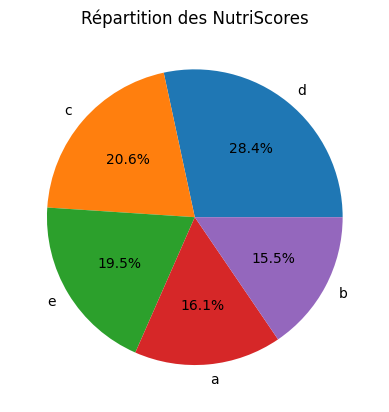

In [16]:
#Pie chart of nutriScore 
nutri_repartition = relevant_data['nutrition_grade_fr'].value_counts()

plt.pie(nutri_repartition, labels=nutri_repartition.index, autopct='%1.1f%%')
plt.title("Répartition des NutriScores")
plt.show()

We observe that the repartition seems almost balanced, except for the categorie "d", \
which represent more than a fourth of the dataset. \
This might have an impact on the training of the model, leading it to false results.

We could examine the repartition of each categories for each rankings.

In [17]:
# Group by nutriscore
grouped_data = relevant_data.groupby('nutrition_grade_fr')

In [18]:
grouped_data["energy_100g"].describe()

,count,mean,std,min,25%,50%,75%,max
nutrition_grade_fr,,,,,,,,
a,35614.0,716.998167,561.193278,0.0,243.00,456.0,1393.0,3209.0
b,34074.0,606.537455,17618.169393,0.0,184.00,322.0,690.0,3251373.0
c,45538.0,1000.536143,778.403709,0.0,438.00,837.0,1536.0,69292.0
d,62763.0,1479.043306,944.714498,0.0,1046.00,1464.0,1841.0,182764.0
e,43030.0,1855.008335,1373.736541,0.0,1554.25,1895.0,2192.0,231199.0


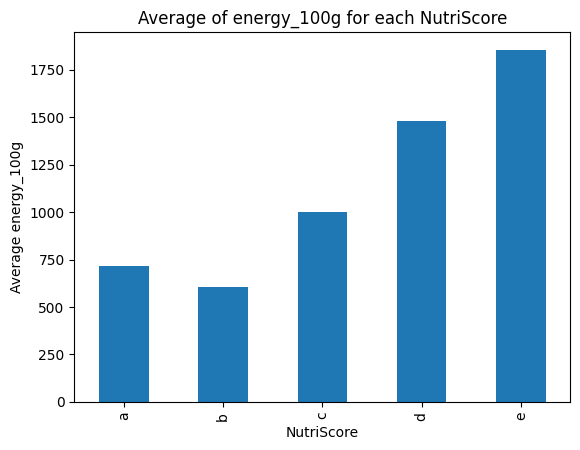

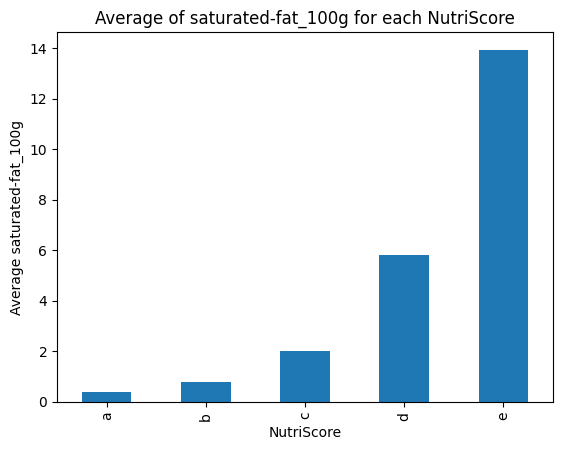

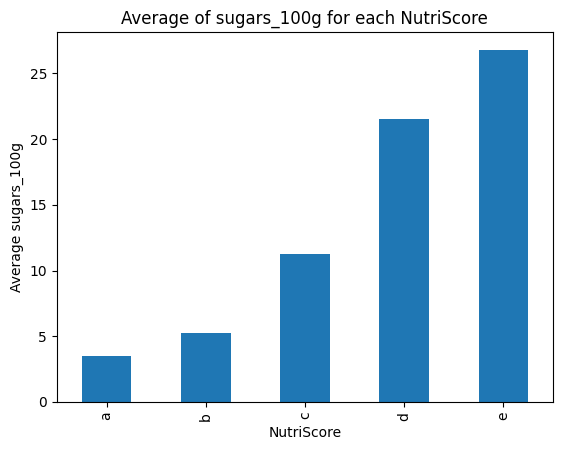

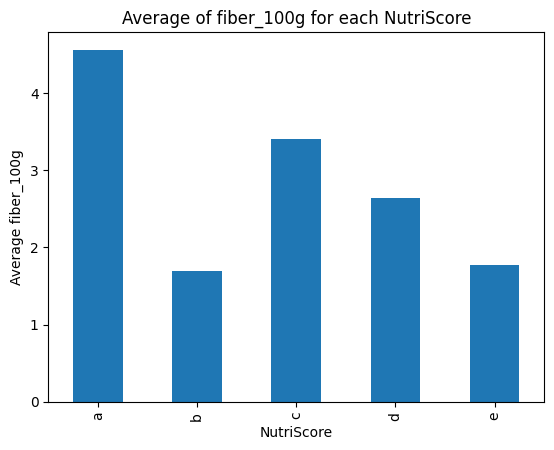

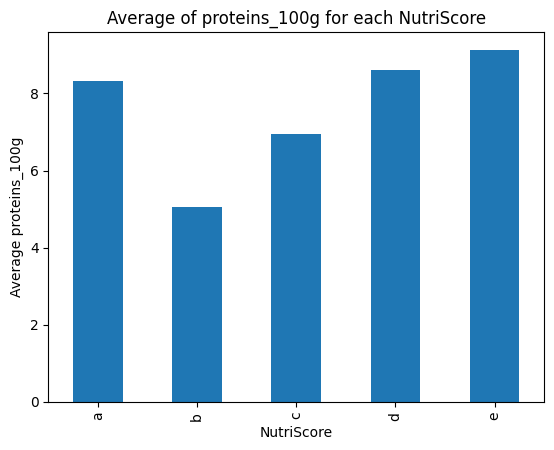

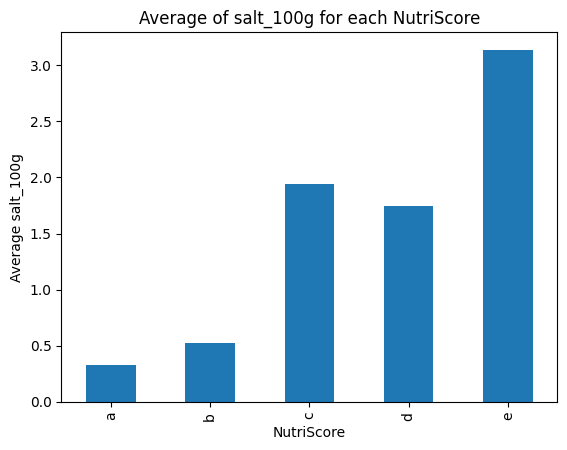

In [19]:
#Selection of columns we want to plot
col_list = relevant_data.columns[3:9]

#plotting repartition of each categories for each Nutri-score
for col in col_list:
    grouped_data[col].mean().plot(kind='bar')
    plt.title(f'Average of {col} for each NutriScore')
    plt.xlabel('NutriScore')
    plt.ylabel(f'Average {col}')
    plt.show()

During exploration, we noticed very high values, that could be erroneous.

The data set will probably require a statistical clean-up

In [20]:
#Define a function to select each lines corresponding to a selected feature in a selected category
def feat_selection(dataframe, selected_category, selected_feature):
    mask = dataframe[selected_category] == selected_feature
    x = dataframe[mask]
    return x


In [ ]:
#Old version
#Looking for outliers with boxplot graphs
nutri_list = ["a", "b", "c", "d", "e"]
for i in nutri_list:
    mask = relevant_data['nutrition_grade_fr'] == i
    #display(relevant_data[mask].head())
    for col in col_list:
        relevant_data[mask][col].plot(kind='box')
        plt.title(f'Repartition of {col} for {i}')
        plt.xlabel(f'NutriScore {i}')
        plt.ylabel(f'Repartition of {col}')
        plt.show()

In [ ]:
#for each value of NutriScore, boxplot each categories
for i in nutri_list:
     for col in col_list:
        feat_selection(relevant_data, 'nutrition_grade_fr', i)[col].plot(kind='box')
        plt.title(f'Repartition of {col} for {i}')
        plt.xlabel(f'NutriScore {i}')
        plt.ylabel(f'Repartition of {col}')
        plt.show()
        

In [ ]:
col_list = relevant_data.columns[3:9]

for col in col_list:
    relevant_data[mask][col].plot(kind='box')
    plt.title(f'Repartition of {col} for {i}')
    plt.xlabel(f'NutriScore {i}')
    plt.ylabel(f'Repartition of {col}')
    plt.show()